**Import Library**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Data Preparation

In [41]:
application_train = pd.read_csv("/content/application_train.csv")
application_test = pd.read_csv("/content/application_test.csv")

In [42]:
print("Data Shape for application_train")
print("Row: ", application_train.shape[0], "Column: ", application_train.shape[1])
print(" ")
print("Data Shape for application_test")
print("Row: ", application_test.shape[0], "Column: ", application_test.shape[1])

Data Shape for application_train
Row:  307511 Column:  122
 
Data Shape for application_test
Row:  48744 Column:  121


In [43]:
print("Statistik deskriptif for application_train:")
print(application_train.describe())

Statistik deskriptif for application_train:
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.0000

In [44]:
print("Statistik deskriptif for application_test:")
print(application_test.describe())

Statistik deskriptif for application_test:
          SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04             

**Check Data Duplicate and Missing Value**

In [45]:
def cek_duplicate_missing(dataset):
  duplicate = dataset.duplicated().sum()
  print("Data Duplikat: ", duplicate)
  missing = dataset.isnull().sum().sum()
  print("Data Missing Value: ", missing)

print("Data application_train")
cek_duplicate_missing(application_train)
print(" ")
print("Data application_test")
cek_duplicate_missing(application_test)

Data application_train
Data Duplikat:  0
Data Missing Value:  9152465
 
Data application_test
Data Duplikat:  0
Data Missing Value:  1404419


# Exploratory Data Analysis

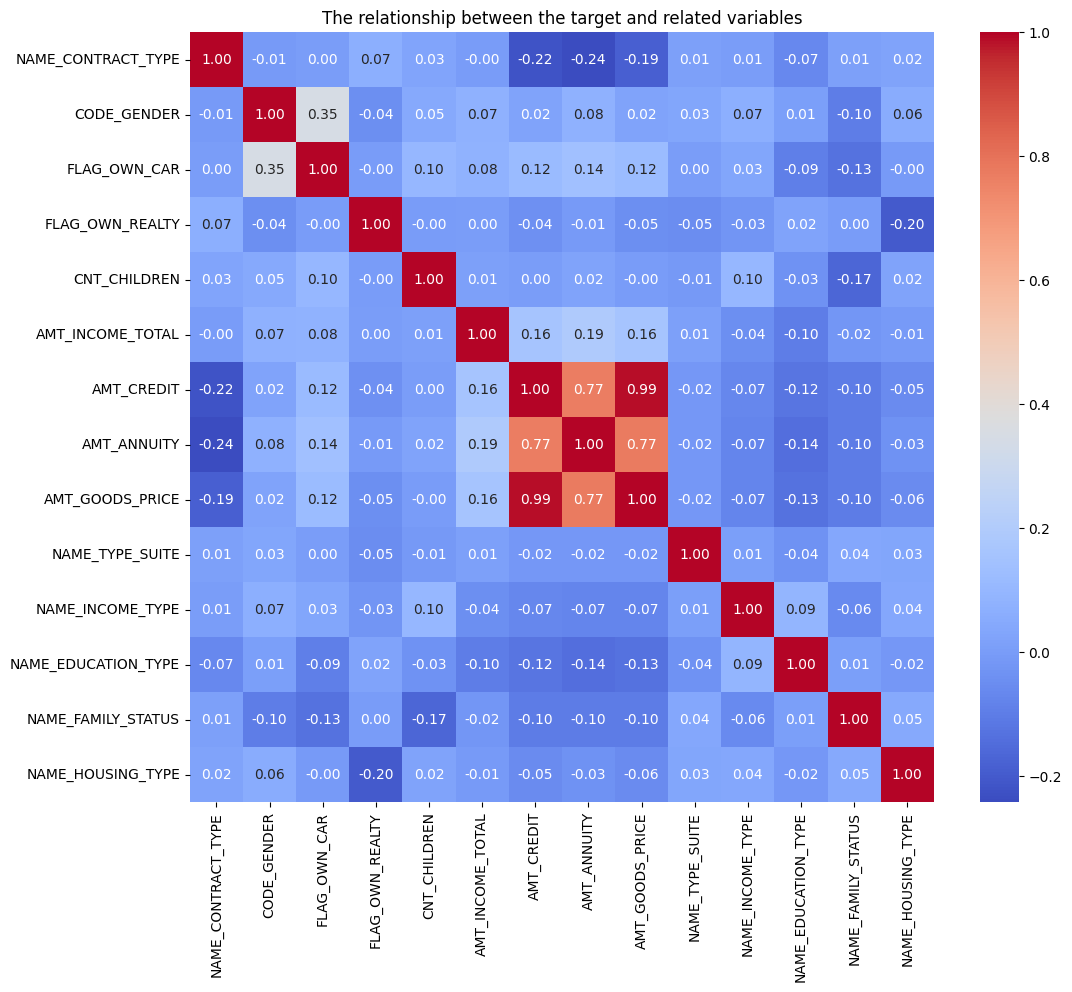

In [80]:
heatmap_data = application_train.iloc[:, 2:16]

heatmap_data['TARGET'] = application_train['TARGET']

correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('The relationship between the target and related variables')
plt.show()

Comparison of data amounts based on the TARGET label

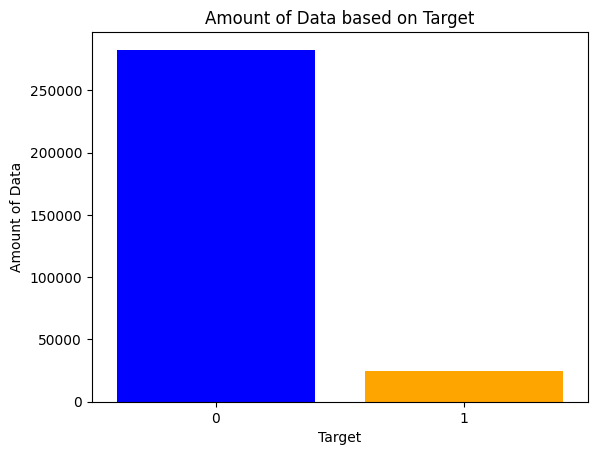

In [47]:
count_target = application_train['TARGET'].value_counts()

application_train['TARGET'] = application_train['TARGET'].astype('category')

plt.bar(application_train['TARGET'].cat.categories, count_target.values, color=['blue', 'orange'])

plt.xticks([0, 1], ['0', '1'])
plt.xlim([-0.5, 1.5])

plt.title('Amount of Data based on Target')
plt.xlabel('Target')
plt.ylabel('Amount of Data')

plt.show()

Comparison of the number of targets based on the type of contract

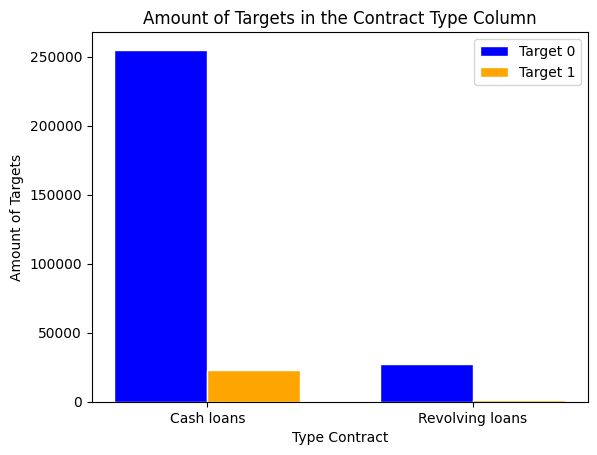

In [48]:
count_target = application_train.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).size().unstack()

type_contract = count_target.index

target_labels = count_target.columns

bar_width = 0.35

r1 = range(len(type_contract))
r2 = [x + bar_width for x in r1]

plt.bar(r1, count_target[0], color='blue', width=bar_width, edgecolor='white', label='Target 0')
plt.bar(r2, count_target[1], color='orange', width=bar_width, edgecolor='white', label='Target 1')

plt.title('Amount of Targets in the Contract Type Column')
plt.xlabel('Type Contract')
plt.ylabel('Amount of Targets')

plt.xticks([r + bar_width/2 for r in range(len(type_contract))], type_contract)

plt.legend()

plt.show()

Comparison of the number of targets based on the gender

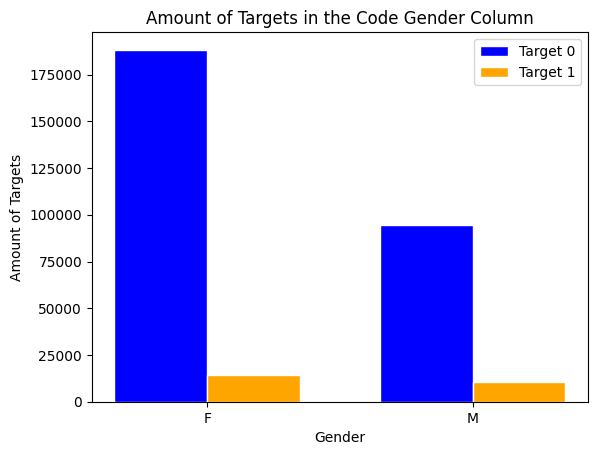

In [49]:
count_target = application_train.groupby(['CODE_GENDER', 'TARGET']).size().unstack()

type_gender = ['F', 'M']
target_labels = count_target.columns

bar_width = 0.35

r1 = range(len(type_gender))
r2 = [x + bar_width for x in r1]

plt.bar(r1, count_target.loc[type_gender, 0], color='blue', width=bar_width, edgecolor='white', label='Target 0')
plt.bar(r2, count_target.loc[type_gender, 1], color='orange', width=bar_width, edgecolor='white', label='Target 1')

plt.title('Amount of Targets in the Code Gender Column')
plt.xlabel('Gender')
plt.ylabel('Amount of Targets')

plt.xticks([r + bar_width/2 for r in range(len(type_gender))], type_gender)

plt.legend()

plt.show()

Comparison of the number of targets based on the car ownership

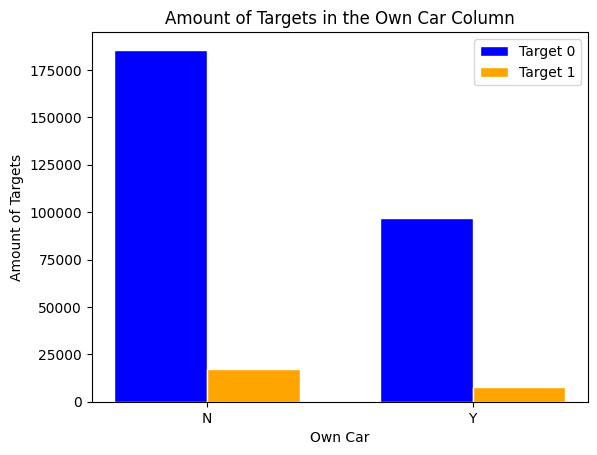

In [50]:
count_target = application_train.groupby(['FLAG_OWN_CAR', 'TARGET']).size().unstack()

own_car = count_target.index
target_labels = count_target.columns

bar_width = 0.35

r1 = range(len(own_car))
r2 = [x + bar_width for x in r1]

plt.bar(r1, count_target[0], color='blue', width=bar_width, edgecolor='white', label='Target 0')
plt.bar(r2, count_target[1], color='orange', width=bar_width, edgecolor='white', label='Target 1')

plt.title('Amount of Targets in the Own Car Column')
plt.xlabel('Own Car')
plt.ylabel('Amount of Targets')

plt.xticks([r + bar_width/2 for r in range(len(own_car))], own_car)

plt.legend()

plt.show()

Comparison of the number of targets based on the realty ownership

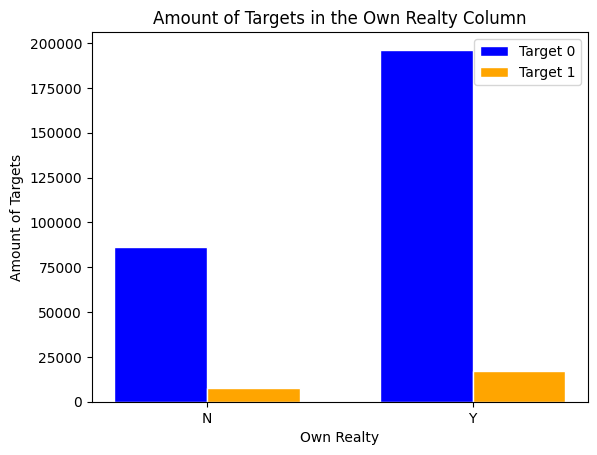

In [51]:
count_target = application_train.groupby(['FLAG_OWN_REALTY', 'TARGET']).size().unstack()

own_realty = count_target.index

target_labels = count_target.columns

bar_width = 0.35

r1 = range(len(own_realty))
r2 = [x + bar_width for x in r1]

plt.bar(r1, count_target[0], color='blue', width=bar_width, edgecolor='white', label='Target 0')
plt.bar(r2, count_target[1], color='orange', width=bar_width, edgecolor='white', label='Target 1')

plt.title('Amount of Targets in the Own Realty Column')
plt.xlabel('Own Realty')
plt.ylabel('Amount of Targets')

plt.xticks([r + bar_width/2 for r in range(len(own_realty))], own_realty)

plt.legend()

plt.show()

Comparison of the number of targets based on the count of children

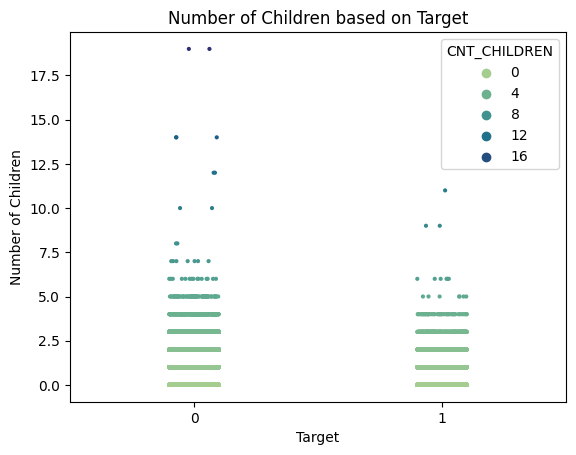

In [52]:
data = application_train[application_train['TARGET'].isin([0, 1])]

sns.stripplot(x='TARGET', y='CNT_CHILDREN', data=data, hue='CNT_CHILDREN', size=3, palette='crest', legend=True)

plt.title('Number of Children based on Target')
plt.xlabel('Target')
plt.ylabel('Number of Children')

plt.show()


The order of the number of users based on the type of suite

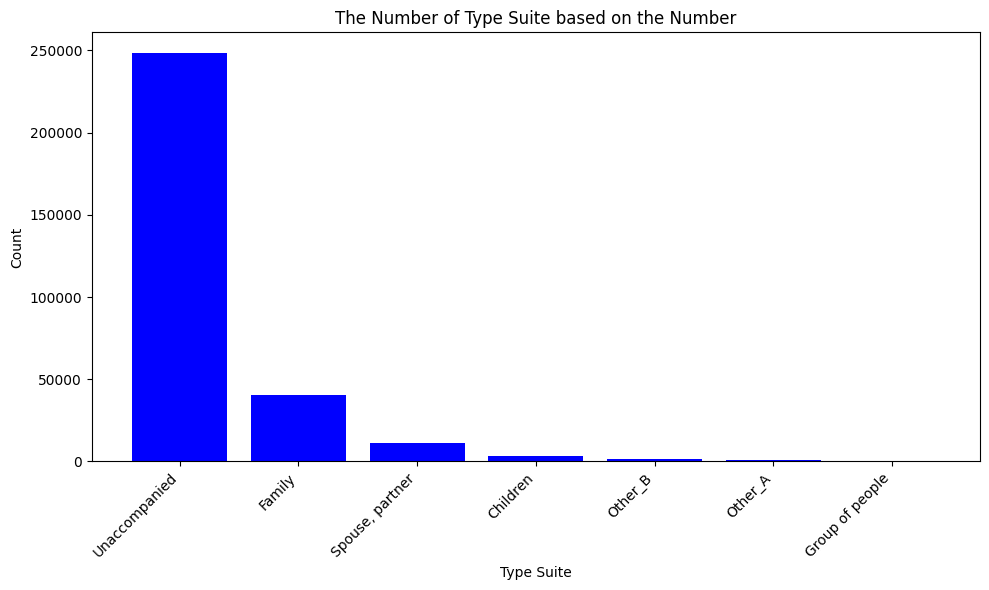

In [53]:
count_type_suite = application_train['NAME_TYPE_SUITE'].value_counts()
count_type_suite = count_type_suite.sort_values(ascending=False)
type_suite = count_type_suite

plt.figure(figsize=(10, 6))
plt.bar(type_suite.index, type_suite.values, color='blue')

plt.title('The Number of Type Suite based on the Number')
plt.xlabel('Type Suite')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The order of the number of users based on the income type

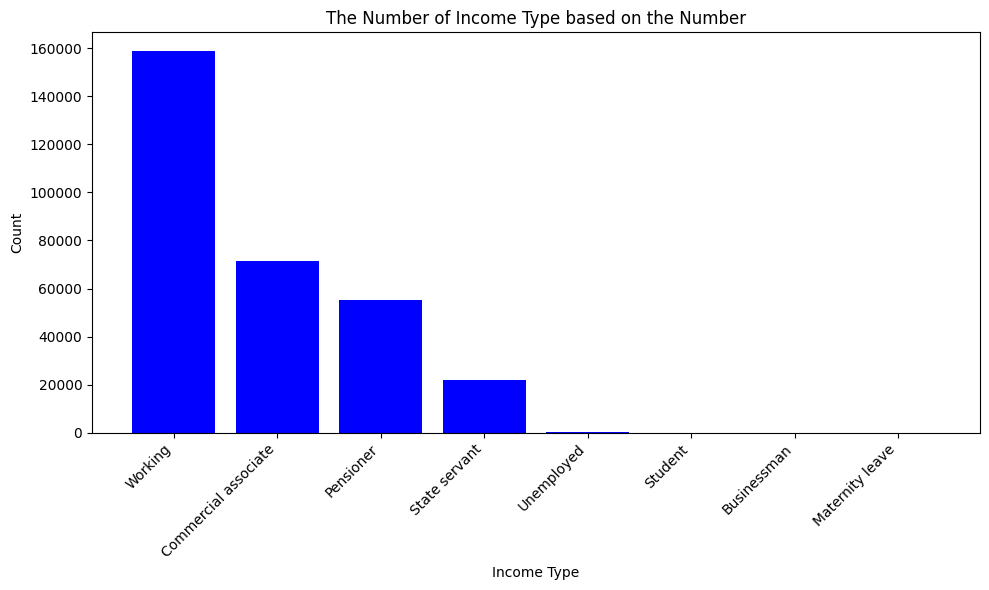

In [54]:
count_income = application_train['NAME_INCOME_TYPE'].value_counts()

count_income = count_income.sort_values(ascending=False)

income_type = count_income

plt.figure(figsize=(10, 6))
plt.bar(income_type.index, income_type.values, color='blue')

plt.title('The Number of Income Type based on the Number')
plt.xlabel('Income Type')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The order of the number of users based on the education type

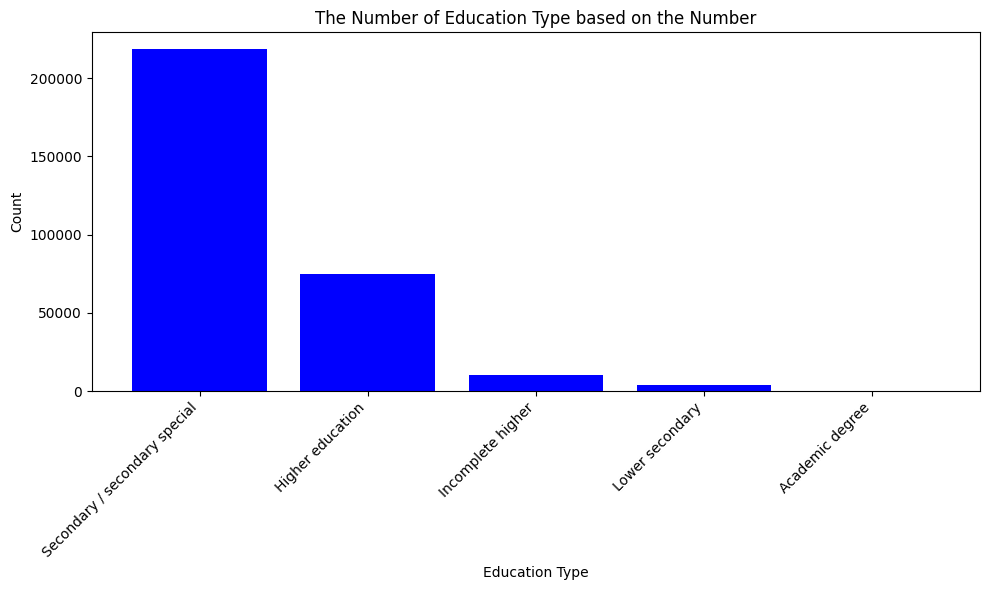

In [55]:
count_education = application_train['NAME_EDUCATION_TYPE'].value_counts()

count_education = count_education.sort_values(ascending=False)

education_type = count_education

plt.figure(figsize=(10, 6))
plt.bar(education_type.index, education_type.values, color='blue')

plt.title('The Number of Education Type based on the Number')
plt.xlabel('Education Type')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The order of the number of users based on the family status

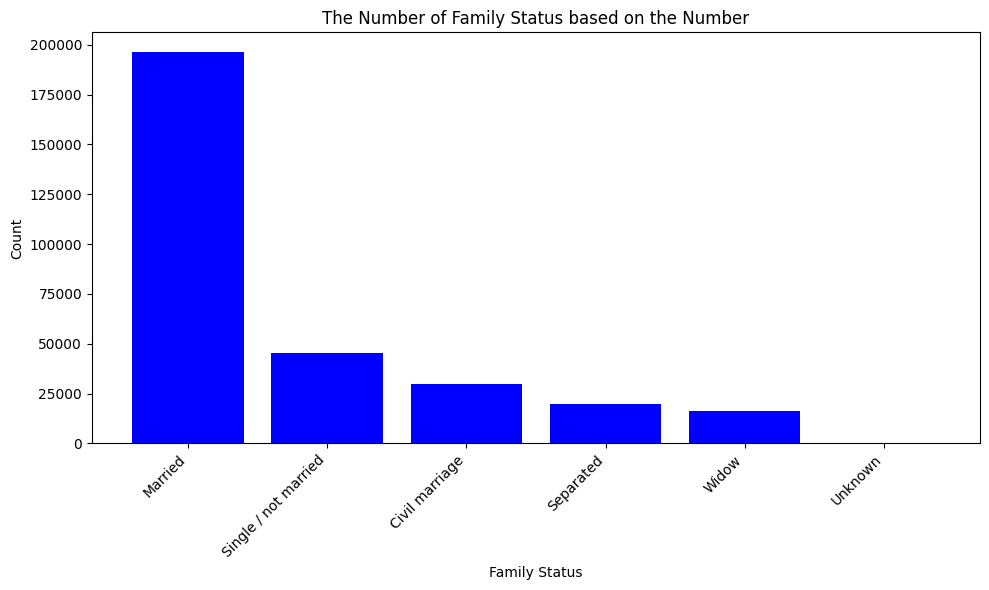

In [56]:
count_family = application_train['NAME_FAMILY_STATUS'].value_counts()

count_family = count_family.sort_values(ascending=False)

family_status = count_family

plt.figure(figsize=(10, 6))
plt.bar(family_status.index, family_status.values, color='blue')

plt.title('The Number of Family Status based on the Number')
plt.xlabel('Family Status')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The order of the number of users based on the housing type

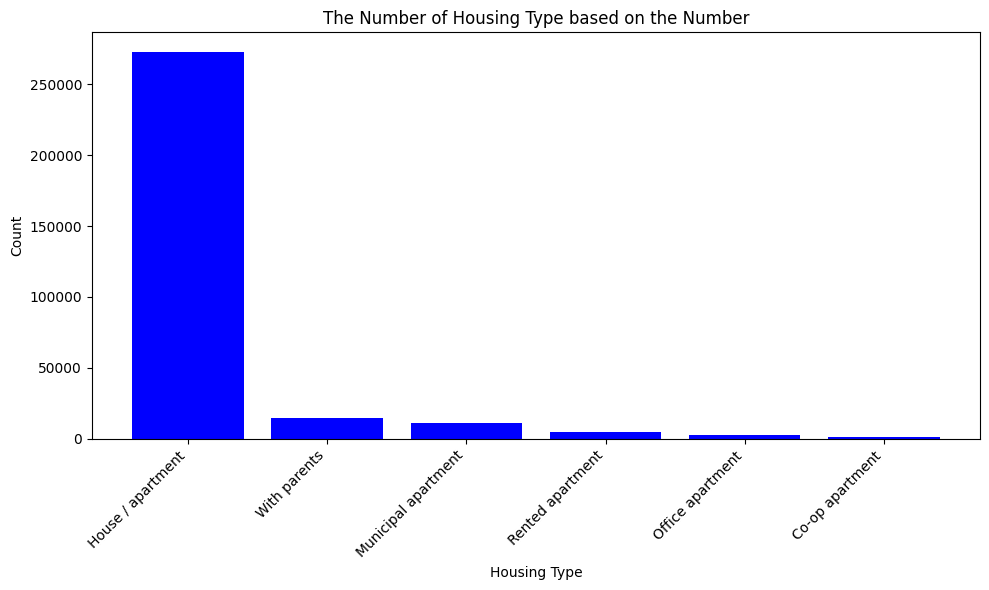

In [57]:
count_housing = application_train['NAME_HOUSING_TYPE'].value_counts()

count_housing = count_housing.sort_values(ascending=False)

housing_type = count_housing

plt.figure(figsize=(10, 6))
plt.bar(housing_type.index, housing_type.values, color='blue')

plt.title('The Number of Housing Type based on the Number')
plt.xlabel('Housing Type')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The order of the number of users based on the organization type

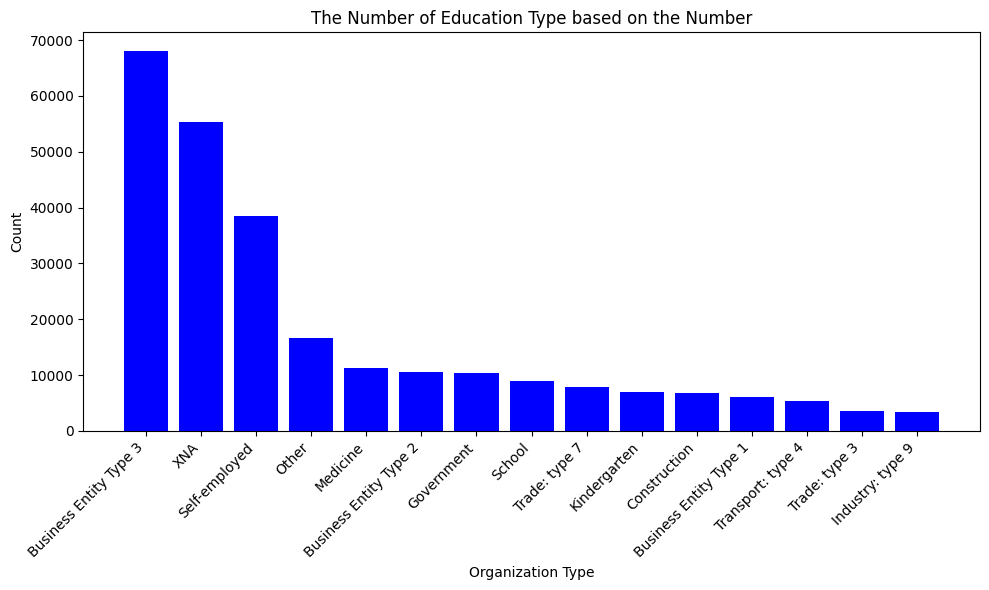

In [58]:
count_organization = application_train['ORGANIZATION_TYPE'].value_counts()

count_organization = count_organization.sort_values(ascending=False)

organization_type = count_organization.head(15)

plt.figure(figsize=(10, 6))
plt.bar(organization_type.index, organization_type.values, color='blue')

plt.title('The Number of Education Type based on the Number')
plt.xlabel('Organization Type')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The order of the number of users based on the occupation type

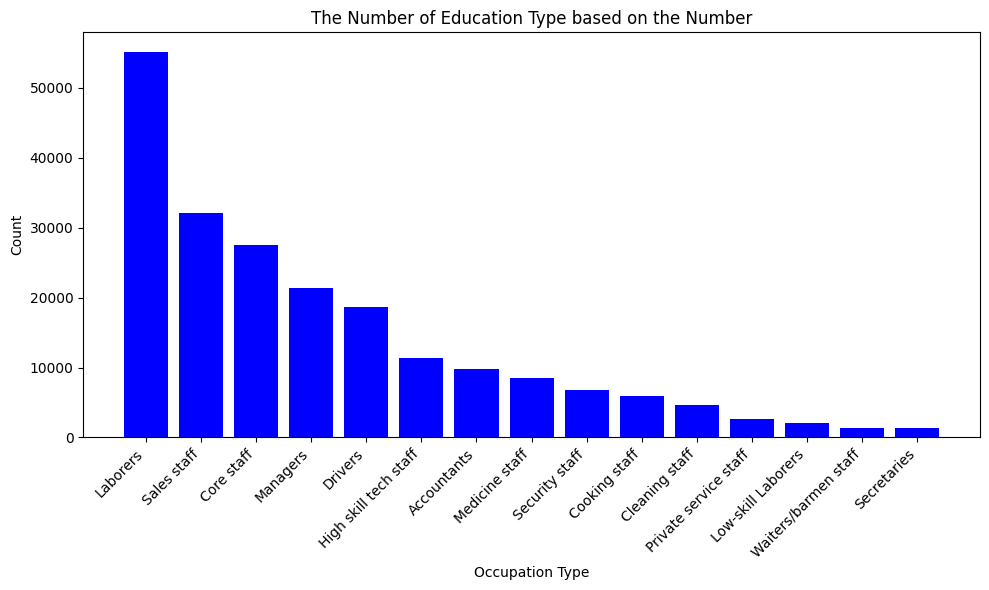

In [59]:
count_occupation = application_train['OCCUPATION_TYPE'].value_counts()

count_occupation = count_occupation.sort_values(ascending=False)

occupation_type = count_occupation.head(15)

plt.figure(figsize=(10, 6))
plt.bar(occupation_type.index, occupation_type.values, color='blue')

plt.title('The Number of Education Type based on the Number')
plt.xlabel('Occupation Type')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Comparison of the number of targets based on the amount income total

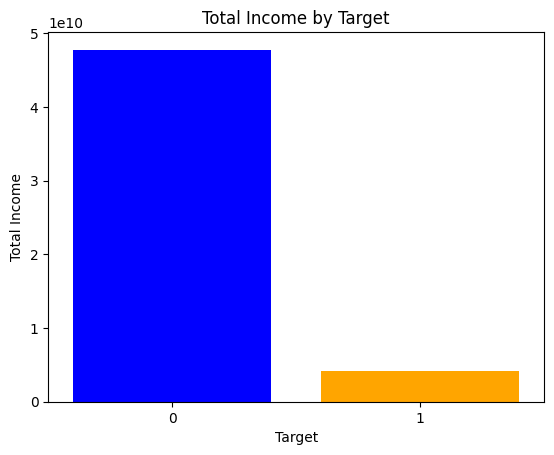

In [60]:
income_by_target = application_train.groupby('TARGET')['AMT_INCOME_TOTAL'].sum()

plt.bar(income_by_target.index, income_by_target.values, color=['blue', 'orange'])

plt.xticks([0, 1], ['0', '1'])
plt.xlim([-0.5, 1.5])

plt.title('Total Income by Target')
plt.xlabel('Target')
plt.ylabel('Total Income')

plt.show()

Comparison of the number of targets based on the amount credit

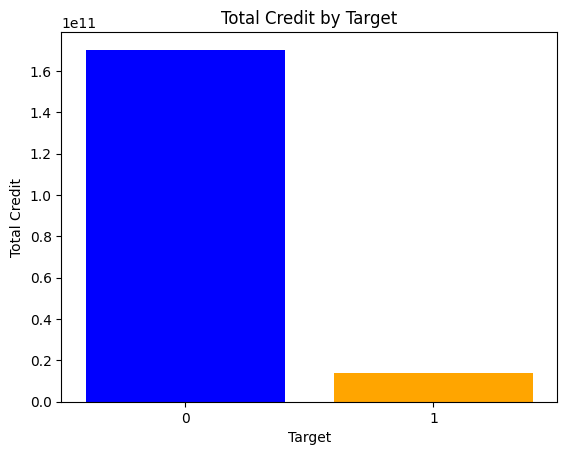

In [61]:
credit_by_target = application_train.groupby('TARGET')['AMT_CREDIT'].sum()

plt.bar(credit_by_target.index, credit_by_target.values, color=['blue', 'orange'])

plt.xticks([0, 1], ['0', '1'])
plt.xlim([-0.5, 1.5])

plt.title('Total Credit by Target')
plt.xlabel('Target')
plt.ylabel('Total Credit')

plt.show()

# Data Preprocessing

**Check Missing Value**

In [62]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values_percent = (missing_values / len(df)) * 100
    missing_data = pd.concat([missing_values, missing_values_percent], axis=1, keys=['Total Missing Values', 'Percentage'])
    return missing_data

In [63]:
print(check_missing_values(application_train))

                            Total Missing Values  Percentage
SK_ID_CURR                                     0    0.000000
TARGET                                         0    0.000000
NAME_CONTRACT_TYPE                             0    0.000000
CODE_GENDER                                    0    0.000000
FLAG_OWN_CAR                                   0    0.000000
...                                          ...         ...
AMT_REQ_CREDIT_BUREAU_DAY                  41519   13.501631
AMT_REQ_CREDIT_BUREAU_WEEK                 41519   13.501631
AMT_REQ_CREDIT_BUREAU_MON                  41519   13.501631
AMT_REQ_CREDIT_BUREAU_QRT                  41519   13.501631
AMT_REQ_CREDIT_BUREAU_YEAR                 41519   13.501631

[122 rows x 2 columns]


In [64]:
print(check_missing_values(application_test))

                            Total Missing Values  Percentage
SK_ID_CURR                                     0    0.000000
NAME_CONTRACT_TYPE                             0    0.000000
CODE_GENDER                                    0    0.000000
FLAG_OWN_CAR                                   0    0.000000
FLAG_OWN_REALTY                                0    0.000000
...                                          ...         ...
AMT_REQ_CREDIT_BUREAU_DAY                   6049   12.409732
AMT_REQ_CREDIT_BUREAU_WEEK                  6049   12.409732
AMT_REQ_CREDIT_BUREAU_MON                   6049   12.409732
AMT_REQ_CREDIT_BUREAU_QRT                   6049   12.409732
AMT_REQ_CREDIT_BUREAU_YEAR                  6049   12.409732

[121 rows x 2 columns]


**Handle Missing Value with MinMax Scaler**

In [65]:
def handle_missing_values(df):
    numeric_columns = df.select_dtypes(include=['float', 'int']).columns
    numeric_columns = numeric_columns.drop('SK_ID_CURR')
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    scaler = MinMaxScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df

In [66]:
df_scaled_train = handle_missing_values(application_train)
print(df_scaled_train)

        SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002      1         Cash loans           M            N   
1           100003      0         Cash loans           F            N   
2           100004      0    Revolving loans           M            Y   
3           100006      0         Cash loans           F            N   
4           100007      0         Cash loans           M            N   
...            ...    ...                ...         ...          ...   
307506      456251      0         Cash loans           M            N   
307507      456252      0         Cash loans           F            N   
307508      456253      0         Cash loans           F            N   
307509      456254      1         Cash loans           F            N   
307510      456255      0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y           0.0          0.00151

In [67]:
df_scaled_test = handle_missing_values(application_test)
print(df_scaled_test)

       SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_IN

**Performing Label Encoder**

In [68]:
def label_encode(df):
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    return df

In [69]:
df_encoded_train = label_encode(df_scaled_train)
print(df_encoded_train)

        SK_ID_CURR TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002      1                   0            1             0   
1           100003      0                   0            0             0   
2           100004      0                   1            1             1   
3           100006      0                   0            0             0   
4           100007      0                   0            1             0   
...            ...    ...                 ...          ...           ...   
307506      456251      0                   0            1             0   
307507      456252      0                   0            0             0   
307508      456253      0                   0            0             0   
307509      456254      1                   0            0             0   
307510      456255      0                   0            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               

In [70]:
df_encoded_test = label_encode(df_scaled_test)
print(df_encoded_test)

       SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0          100001                   0            0             0   
1          100005                   0            1             0   
2          100013                   0            1             1   
3          100028                   0            0             0   
4          100038                   0            1             1   
...           ...                 ...          ...           ...   
48739      456221                   0            0             0   
48740      456222                   0            0             0   
48741      456223                   0            0             1   
48742      456224                   0            1             0   
48743      456250                   0            0             1   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    1          0.00          0.024654    0.238037   
1                    1          0.00       

# Data Processing

**Train and Test Data**

In [71]:
X= df_encoded_train.drop(['SK_ID_CURR','TARGET'], axis=1)
y= df_encoded_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
test_x_predict = application_test.drop(['SK_ID_CURR'],axis=1)

#### Modeling Data

**Model Logistic Regression**

In [73]:
import warnings
warnings.filterwarnings("ignore")

model_lr = LogisticRegression(max_iter=1000)

model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Akurasi Prediksi (Logistic Regression):", accuracy_lr)

y_pred_test_lr = model_lr.predict(test_x_predict)

print("Hasil Prediksi pada Dataset Test:")
print(y_pred_test_lr)

Akurasi Prediksi (Logistic Regression): 0.9192397118839731
Hasil Prediksi pada Dataset Test:
[0 0 0 ... 0 0 0]


**Model Decision Tree**

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model_dt = DecisionTreeClassifier()

model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Akurasi Prediksi (Decision Tree):", accuracy_dt)

y_pred_test_dt = model_dt.predict(test_x_predict)

print("Hasil Prediksi pada Dataset Test:")
print(y_pred_test_dt)

Akurasi Prediksi (Decision Tree): 0.8506089133863389
Hasil Prediksi pada Dataset Test:
[0 0 1 ... 1 0 0]


In [75]:
models = ['Logistic Regression', 'Decision Tree']
models_acc = [accuracy_lr, accuracy_dt]

cols = ['accuracy score']

data_accuracy = pd.DataFrame(data=models_acc , index= models , columns= cols)
data_accuracy

,accuracy score
Logistic Regression,0.919240
Decision Tree,0.850609


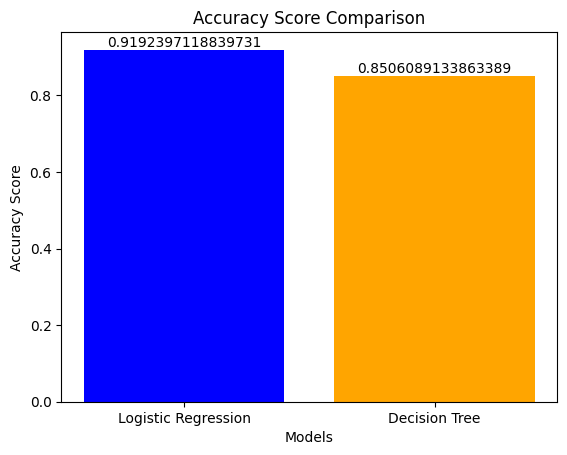

In [76]:
models = ['Logistic Regression', 'Decision Tree']
accuracy_scores = data_accuracy['accuracy score']

colors = ['blue', 'orange']

plt.bar(models, accuracy_scores, color=colors)

plt.title('Accuracy Score Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

for i in range(len(models)):
    plt.text(models[i], accuracy_scores[i], str(accuracy_scores[i]), ha='center', va='bottom')

plt.show()

# Evaluation

**Confusion Matrix for Logistic Regression**

In [77]:
from sklearn.metrics import classification_report

print (classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.42      0.01      0.02      4949

    accuracy                           0.92     61503
   macro avg       0.67      0.50      0.49     61503
weighted avg       0.88      0.92      0.88     61503



# Final Submission

In [78]:
submission = pd.DataFrame({'SK_ID_CURR': application_test['SK_ID_CURR'], 'TARGET': y_pred_test_lr })
submission.to_csv("submission.csv", index = False)
submission

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,0
